# Table of Contents
 <p><div class="lev1 toc-item"><a href="#CG(ComputerGraphics)" data-toc-modified-id="CG(ComputerGraphics)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CG(ComputerGraphics)</a></div><div class="lev2 toc-item"><a href="#listplot,-pointplot" data-toc-modified-id="listplot,-pointplot-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>listplot, pointplot</a></div><div class="lev2 toc-item"><a href="#写像の表示" data-toc-modified-id="写像の表示-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>写像の表示</a></div><div class="lev2 toc-item"><a href="#回転写像" data-toc-modified-id="回転写像-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>回転写像</a></div><div class="lev2 toc-item"><a href="#平行投影図の作成" data-toc-modified-id="平行投影図の作成-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>平行投影図の作成</a></div><div class="lev2 toc-item"><a href="#透視図" data-toc-modified-id="透視図-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>透視図</a></div><div class="lev2 toc-item"><a href="#Mapleの描画関数の覚書" data-toc-modified-id="Mapleの描画関数の覚書-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Mapleの描画関数の覚書</a></div><div class="lev1 toc-item"><a href="#動画(Animation)" data-toc-modified-id="動画(Animation)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>動画(Animation)</a></div><div class="lev2 toc-item"><a href="#matplotlibでanimation" data-toc-modified-id="matplotlibでanimation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>matplotlibでanimation</a></div><div class="lev2 toc-item"><a href="#plotの動画" data-toc-modified-id="plotの動画-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plotの動画</a></div><div class="lev2 toc-item"><a href="#Runge-Kutta4次公式" data-toc-modified-id="Runge-Kutta4次公式-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Runge-Kutta4次公式</a></div><div class="lev2 toc-item"><a href="#連立方程式にRunge-Kutta4次公式を" data-toc-modified-id="連立方程式にRunge-Kutta4次公式を-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>連立方程式にRunge-Kutta4次公式を</a></div><div class="lev2 toc-item"><a href="#animate関数" data-toc-modified-id="animate関数-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>animate関数</a></div><div class="lev2 toc-item"><a href="#リストに貯めて，display表示" data-toc-modified-id="リストに貯めて，display表示-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>リストに貯めて，display表示</a></div><div class="lev2 toc-item"><a href="#凝った例" data-toc-modified-id="凝った例-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>凝った例</a></div><div class="lev2 toc-item"><a href="#ファイルへの保存" data-toc-modified-id="ファイルへの保存-28"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>ファイルへの保存</a></div>

<br />

<div style="text-align: center;">
<font size="7">描画(CG)</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">file:/~/python/doing_math_with_python/cg.ipynb</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2017 </font>
</div>

# CG(ComputerGraphics)

## listplot, pointplot 


リスト構造にある離散的なデータはlistplotで表示してくれる．listplotは受け取ったlistの要素をy値に，1から始まる添字をx値にして，デフォルトで
は線でグラフを書く．
```maple
> T:=[seq(exp(-i),i=0..5)]; 
> listplot(T);
```
$$
T\, := \,[1,\exp(-1),\exp(-2),\exp(-3),\exp(-4),\exp(-5)]
$$

|{{attach_view(MapleCGplot2d1.png,)}}|
|:----|


以下のようにoptionをつけるとpointで描く．
```maple
> listplot(T,style=point):
```

それぞれの値の横軸xが1,2,3,..では不都合なときには，2次元のlistlist構造を用意し，[x[i],y[i]]を入れてpointplot関数で表示する
．
```maple
> T:=[seq([i/2,exp(-i/2)],i=0..6)]; 
> pointplot(T,symbol=circle,symbolsize=20);
```
$$
T\, := \,[[0,1],[1/2,\exp(-1/2)],[1,\exp(-1)],[3/2,\exp(-3/2)], \notag \\
[2,\exp(-2)],[5/2,\exp(-5/2)],[3,\exp(-3)]]
$$

|{{attach_view(MapleCGplot2d2.png,)}}|
|:----|



listplotのように線でつなぎたい時には，以下のようにoptionをつける．
```maple
> pointplot(T,connect=true):
```




## 写像の表示 


ある行列によって点を移動させる写像の様子を示すスクリプトを通して，plottoolsが提供するdisk, arrowの使い方を示す．先ず描画に必要なライブラリーパッケージ(plotsおよびplottools)をwithで読み込んでおく．
```maple
> restart; with(plots):with(plottools):
```
$$
$$
行列$A= \left[ \begin {array}{cc} 1&2\\ 2&1\end {array} \right]$
によって点$a_0$(1, 2)が$a_1$(5, 4)に移動するとする(LinearAlgebra参照）．
```maple
> with(LinearAlgebra): A:=Matrix([[1,2],[2,1]]): a0:=Vector([1,2]): a1:=A.a0;
```
$$
{\it a1}\, := \, \left[ \begin {array}{c} 5\\ 4\end {array} \right]
$$
ベクトルが位置座標を意味するようにlistへ変換(convert)する．
```maple
> p0:=convert(a0,list):p1:=convert(a1,list):
```
位置p0に円(disk)を半径0.2,赤色で描く．同じように位置p1に半径0.2，青色でdiskを描く．
```maple
> point1:=[disk(p0,0.2,color=red),disk(p1,0.2,color=blue)]:
```
もう一つ，p0からp1に向かう矢印(arrow)を適当な大きさで描く．後ろの数字をいじると線の幅や矢印の大きさが変わる．
```maple
> line1:=arrow(p0,p1,0.05,0.3,0.1):
```
これらをまとめて表示(display)．このとき，表示範囲を0..6,0..6とする．
```maple
> display(point1,line1,view=[0..6,0..6],gridlines=true);
```

|{{attach_view(MapleCGplot2d3.png,)}}|
|:----|

$a_0$(1, 2)の赤点が，$a_1$(5, 4)の青点へ移動していることを示している．




## 回転写像 


次に原点周りでの回転の様子を示す．回転の行列．
```maple
> Matrix([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]]);
```
$$
\left[ \begin {array}{cc} \cos \left( \theta \right) &\sin \left( \theta \right) \\ -\sin \left( \theta \right) &\cos \left( \theta \right) \end {array} \right]
$$
これを関数のように定義している．
```maple
> A:=t->Matrix([[cos(t),sin(t)],[-sin(t),cos(t)]]);
```
$$
A\, := \,t\mapsto  \left[ \begin {array}{cc} \cos \left( t \right) &\sin \left( t \right) \\ -\sin \left( t \right) &\cos \left( t \right) \end {array} \right]
$$
tに回転角(Pi/3)を入れている．
```maple
> a0:=Vector([3,0]);
> a1:=A(Pi/3).a0;
```
$$
{\it a0}\, := \, \left[ \begin {array}{c} 3\\ 0\end {array} \right] \notag \\
{\it a1}\, := \, \left[ \begin {array}{c} 3/2\\ -3/2\,\sqrt {3}\end {array} \right] \notag
$$
表示の仕方は，前節と同じ．
```maple
> p0:=convert(a0,list):p1:=convert(a1,list):
> point1:=[disk(p0,0.2,color=red),disk(p1,0.2,color=blue)]:
> line1:=arrow(p0,p1,0.05,0.3,0.1):
> display(point1,line1,view=[-4..4,-4..4],gridlines=true);
```

|{{attach_view(MapleCGplot2d4.png,)}}|
|:----|





## 平行投影図の作成 


もう少し複雑な対象物として，ここでは立方体の表示を考える．まず３次元座標を打ち込む．
```maple
> restart; with(plots): with(plottools): 
  p:=[[0,0,0],[1,0,0],[1,1,0],[0,1,0],
  [0,0,1],[1,0,1],[1,1,1],[0,1,1]]:
```
$$
$$
次にこれをpointplot3dで簡便に表示．
```maple
> points:= { seq(p[i],i=1..8) }:
> pointplot3d(points,symbol=circle,symbolsize=40,color=black);
```

|{{attach_view(MapleCGplot3d5.png,)}}|
|:----|

もうすこし見やすいように頂点を結んでおく．たとえば，p[1]とp[2]との間を線で結ぶには，

```maple
> line(p[1],p[2]);
```
とする．それをseqで複数の点間に対して施す．

```maple
> ll:=[[1,2],[2,3],[3,4],[4,1],[1,5],[2,6],[3,7],[4,8],
> [5,6],[6,7],[7,8],[8,5]]:
> lines:=[seq(line(p[ll[i][1]],p[ll[i][2]]),i=1..nops(ll))]:
> display(lines,scaling=constrained,color=black);
```

|{{attach_view(MapleCGplot3d6.png,)}}|
|:----|


```maple
> l3:=display(lines,scaling=constrained,color=black):
> p3:=pointplot3d(p,symbol=circle,symbolsize=40,color=black):
> display([p3,l3],scaling=constrained,color=black);
```

|{{attach_view(MapleCGplot3d7.png,)}}|
|:----|



画像をつまんでぐるぐる回してみよ．Mapleではこんな操作は簡単にできるが，よく見ればわかるように，この3次元表示では透視図ではなく，平行投影図といわれるものを書いている．




## 透視図 


透視図のもっとも簡単な変換法は
```maple
> proj2d:=proc(x,z) 
    local x1,y1; 
    x1:=x[1]*z/(z-x[3]); 
    y1:=x[2]*z/(z-x[3]);
    return [x1,y1]; 
  end proc:
```
$$
$$
zに視点の距離を入れて，xで座標を受け取って変換した結果を[x1,y1]として返している．この関数を前の表示と組み合わせれば透視図の描画ができる．
```maple
> z_p:=-8:
  lines:=[seq(line(proj2d(p[ll[i][1]],z_p), proj2d(p[ll[i][2]],z_p)), i=1..nops(ll))]:
  display(lines);
```

|{{attach_view(MapleCGplot2d8.png,)}}|
|:----|





## Mapleの描画関数の覚書 


mapleにはいくつかの描画レベルに合わせた関数が用意されている．どのような目的にどの関数（パッケージ）を使うかの選択指針として，それぞれがどのような意図で作ら
れ，それらの依存関係は以下の通り．
<dl>
<dt>描画の下位関数</dt><dd></dd>
</dl>
plot[structure]にあるPLOT,PLOT3Dデータ構造が一番下でCURVES,POINTS,POLYGONS,TEXTデータを元に絵を描く．
<dl>
<dt>plottoolsパッケージ</dt><dd></dd>
</dl>
PLOTよりもう少し上位で，グラフィックスの基本形状を生成してくれる関数群．arc, arrow, circle, curve, line, point,sphereなどの関数があり，PLOT構造を吐く．表示にはplots[display]を使う．
<dl>
<dt>plotsパッケージ</dt><dd></dd>
</dl>
簡単にグラフを書くための道具．たとえばlistplotは，listデータを簡易に表示する事を目的としている．




# 動画(Animation)


## matplotlibでanimation

以下は，[勾配降下法の結果を matplotlib アニメーション出力する](https://qiita.com/QUANON/items/e4a4847f338eb3251e53)
にあるのをそのまま写した．shift-returnでdirectoryにgradient_descent.gifが作られる．macではこれをfinderで選んで
spaceを押すとquick viewでanimationが見れる．

総ステップ数: 10792
最小値 (勾配降下法): -0.331667951428822
最小値 (f1x = 0 の解): -0.3333333333333333


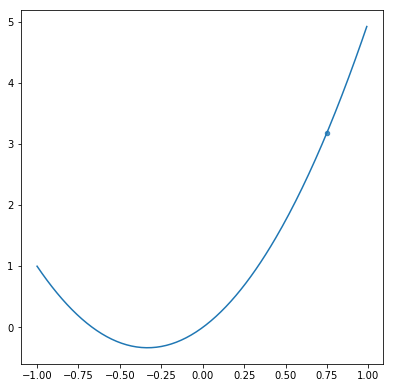

In [5]:
%matplotlib inline

from sympy import Derivative, Symbol, sympify, solve
from numpy import arange
import matplotlib.pyplot as plt
import matplotlib.animation as ani


def gradient_descent(x0, f1x, x, epsilon=1e-6, step_size=1e-4):
  # f1x = 0 の解を持つか調べる。
  if not solve(f1x):
    return

  x_old = x0
  x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
  X_traversed = []

  while abs(x_old - x_new) > epsilon:
    X_traversed.append(x_new)
    x_old = x_new
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()

  return x_new, X_traversed


def draw_graph(f, x):
  X = arange(-1, 1, 0.01)
  Y = [f.subs({x: x_val}) for x_val in X]

  plt.plot(X, Y)


def draw_frame(i, x, X, Y):
  plt.clf()
  draw_graph(f, x)
  plt.scatter(X[i], Y[i], s=20, alpha=0.8)


if __name__ == '__main__':
  x = Symbol('x')
  f = 3 * x ** 2 + 2 * x
  var0 = 0.75  # 勾配降下法の初期値

  d = Derivative(f, x).doit()

  # gradient_descent() は、勾配降下法で求めた最小値と各ステップでの x の値を返す。
  var_min, X_traversed = gradient_descent(var0, d, x)

  print('総ステップ数: {0}'.format(len(X_traversed)))
  print('最小値 (勾配降下法): {0}'.format(var_min))
  print('最小値 (f1x = 0 の解): {0}'.format(float(solve(d)[0])))

  X = X_traversed[::100] # (1)
  Y = [f.subs({x: x_val}) for x_val in X]

  fig = plt.figure(figsize=(6.5, 6.5))

  anim = ani.FuncAnimation(fig, draw_frame, fargs=(x, X, Y), frames=len(X)) # (2)
  anim.save('gradient_descent.gif', writer='imagemagick', fps=10) # (3)

## plotの動画

もう一つ．[ほげおのクラフト](https://hogeocraft.blogspot.jp/2016/12/jupyter-notebook-python3.html)の例．ffmpegでエラーが出た．Mac版をinstallして．．．
>  brew install ffmpeg

再度動かしてみると動いた！！？

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [7]:
dn = np.random.choice([-1,1], size=100)
swalk = np.cumsum(dn)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((-10, 10))

line, = ax.plot([], [], lw=2)
plt.close()

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.arange(i)
    y = swalk[:i]
    line.set_data(x, y)
    return (line,)
# equivalent to rcParams['animation.html'] = 'html5'
plt.rcParams['animation.html'] = 'html5'

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)

In [8]:
anim

## Runge-Kutta4次公式
2次と同様の考え方で，$h^4$の精度を持つRunge-Kutta４次公式を作ることができる．

微分方程式
$$
\frac{dy}{dx} = f(x,y), \, {\textrm where}y(x_0)=y_0
$$

の数値解は，刻み幅を$h$，$x_n=x_0+nh$として，次の漸化式
$$
y_{n+1} = y_n +k (n=0,1,2,\cdots)
$$
で与えられる．ここに，$k$は次で定める．
$$
\begin{aligned}
k_1 & = hf(x_n,y_n), \\
k_2 & = hf(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}), \\
k_3 & = hf(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}), \\
k_4 & = hf(x_n+h, y_n+k_3), \\
k & = \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{aligned}
$$

## 連立方程式にRunge-Kutta4次公式を
連立微分方程式
$$
\begin{aligned}
\frac{dy}{dx} &= f(x,y,z), &\, \, where \, y(x_0)=y_0 \\
\frac{dz}{dx} &= g(x,y,z), &\, \, where \, z(x_0)=z_0 \\
\end{aligned}
$$

の数値解は，刻み幅を$h$，$x_n=x_0+nh$として，次の漸化式
$$
\begin{aligned}
y_{n+1} & = y_n +k &\, (n=0,1,2,\cdots) \\
z_{n+1} & = z_n +l &\, (n=0,1,2,\cdots) \\
\end{aligned}
$$
で与えられる．ここに，$k,l$は次で定める．
$$
\begin{aligned}
k_1 &= hf(x_n,y_n,z_n), \,
&l_1 &= hg(x_n,y_n,z_n), \\
k_2 &= hf(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}, z_n+\frac{l_1}{2}), \,
&l_2 &= hg(x_n+\frac{h}{2}, y_n+\frac{k_1}{2}, z_n+\frac{l_1}{2}), \\
k_3 &= hf(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}, z_n+\frac{l_2}{2}), \,
&l_3 &= hg(x_n+\frac{h}{2}, y_n+\frac{k_2}{2}, z_n+\frac{l_2}{2}), \\
k_4 &= hf(x_n+h, y_n+k_3, z_n+l_3), \,
&l_4 &= hg(x_n+h, y_n+k_3, z_n+l_3), \\
k &= \frac{1}{6}(k_1+2k_2+2k_3+k_4), \,
&l &= \frac{1}{6}(l_1+2l_2+2l_3+l_4)
\end{aligned}
$$

In [1]:
def runge_kutta4(x0,y0,z0,h):
  k1= h * ff(x0, y0, z0);
  l1= h * gg(x0, y0, z0);
  k2= h * ff(x0 + h/2, y0 + k1/2, z0 + l1/2)
  l2= h * gg(x0 + h/2, y0 + k1/2, z0 + l1/2)
  k3= h * ff(x0 + h/2, y0 + k2/2, z0 + l2/2)
  l3= h * gg(x0 + h/2, y0 + k2/2, z0 + l2/2)
  k4= h * ff(x0 + h,   y0 + k3,   z0 + l3)
  l4= h * gg(x0 + h,   y0 + k3,   z0 + l3)
  kk= 1.0/6*(k1 + 2*k2 + 2*k3 + k4)
  ll= 1.0/6*(l1 + 2*l2 + 2*l3 + l4)
  return [kk,ll]

Runge-Kuttaの４次公式をそのままcodingすると上のようになります．これを先ほどのバネ運動の問題に当てはめてみましょう．

先ほど導出した運動方程式の漸化式
$$
\begin{aligned}
v_{i+1} & = v_i - \frac{k}{m} x_i\, dt \\
x_{i+1} & = x_i + v_i\, dt
\end{aligned}
$$

とRunge-Kutta4次公式を示した連立微分方程式
$$
\begin{aligned}
\frac{dy}{dx} &= f(x,y,z), \, where \, y(x_0)=y_0 \\
\frac{dz}{dx} &= g(x,y,z), \, where \, z(x_0)=z_0 \\
\end{aligned}
$$
とを比べて，変数の表記の違いと関数$f,g$を具体的に書き下します．

| 4次の公式 | 運動方程式 |
|:-----:|:-----:|
|x | t |
|y | x |
|z | v |
|f(x,y,z) | f(t,x,v) = v |
|g(x,y,z) | g(t,x,v) = -k x |

この変数の書き換えを吸収する中間関数としてEuler3を書き換えます．RungeKutta4の仮引数を上の表に従って置き換えて，数値を渡しています．また，関数$f,g$も定義しておきます．

In [3]:
def ff(t,x,v):
  return v

def gg(t,x,v):
  return -k*x

def ode(x0, v0):
  kk,ll = runge_kutta4(0, x0, v0, dt)
  x1 = x0 + kk
  v1 = v0 + ll
  return [x1, v1]

t, dt, k=0.0, 1, 0.01
tt,xx,vv=[0.0],[0.0],[0.01]
for i in range(0,500):
  t += dt
  x, v = ode(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)

#my_plot(xx, vv, tt)

これを前と同様に走らせると
発散も収束もすることなく，定常的に振動を繰り返していることが見て取れます．

In [4]:
# %notebook inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

t_t= np.array(tt)
x_y= np.array(xx)
v_y= np.array(vv)

fig, ax = plt.subplots()
ax.set_xlim(( 0, 500))
ax.set_ylim((-0.1,0.1))
plt.hlines(0, 0, 500, color='k', linestyle='-', linewidth=1)
l_x, = ax.plot(x_y, 'b', lw=2)
l_v, = ax.plot(v_y, 'r', lw=2)
plt.close

def init():
    l_x.set_data([], [])
    l_v.set_data([], [])
    return (l_x, l_v)

def animate(i):
    x = t_t[:i]
    l_x.set_data(x, x_y[:i])
    l_v.set_data(x, v_y[:i])
    return (l_x, l_v)

plt.rcParams['animation.html'] = 'html5'

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=50, blit=True)

In [5]:
anim

## animate関数 


plotsパッケージにあるanimate関数を使う．構文は以下の通りで，[]内に動画にしたい関数を定義し，tで時間を変えていく．
```maple
> with(plots): animate(plot, [sin(x-t),x=0..5*Pi], t=0..10);
```

|{{attach_view(MapleCGplot2d9.png,)}}|
|:----|





## リストに貯めて，display表示 


おなじ動作を，display関数でオプションとしてinsequence=trueとしても可能．この場合は第一引数に入れるリスト([])に一連の画像を用意し，コマ
送りで表示させる．
```maple
> tmp:=[]: n:=10: for i from 0 to n do t:=i; tmp:=[op(tmp),
> plot(sin(x-t)+sin(x+t),x=0..5*Pi)]; end do:
> display(tmp,insequence=true);
```

|{{attach_view(MapleCGplot2d10.png,)}}|
|:----|





## 凝った例 


ヘルプにある凝った例．Fという動画のコマを吐く関数を用意する．これを，animate関数から適当な変数を入れて呼び出す．backgroundには動かない絵を指定
することができる．
```maple
> with(plottools,line): F := proc(t) plots[display](
> line([-2,0],[cos(t)-2,sin(t)],color=blue),
> line([cos(t)-2,sin(t)],[t,sin(t)],color=blue),
> plot(sin(x),x=0..t,view=[-3..7,-5..5]) ); end:
> animate(F,[theta],theta=0..2*Pi, background=plot([cos(t)-2,sin(t),t=0..2*Pi]),
> scaling=constrained,axes=none);
```
$$
$$

|{{attach_view(MapleCGplot2d11.png,)}}|
|:----|





## ファイルへの保存 


animationなどのgif形式のplotを外部ファイルへ出力して表示させるには，以下の一連のコマンドのようにする．
```maple
> plotsetup(gif,plotoutput=file2): display(tmp,insequence=true);
> plotsetup(default):
```
こいつをquicktimeなどに食わせれば，Maple以外のソフトで動画表示が可能となる．3次元図形の標準規格であるvrmlも同じようにして作成することが可能(?vrml;参照)．
